In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 5736 (delta 12), reused 16 (delta 5), pack-reused 5705
Receiving objects: 100% (5736/5736), 13.37 MiB | 32.84 MiB/s, done.
Resolving deltas: 100% (3843/3843), done.


In [ ]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 35kB/s 
     |████████████████████████████████| 368kB 43.7MB/s 
     |████████████████████████████████| 3.2MB 53.1MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [ ]:
!pip install keras=='2.3.0'

%cd keras-retinanet/
!pip install .

     |████████████████████████████████| 378kB 2.9MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169024 sha256=89eb5fdb4f68a4199ebbdaceff29316dce426fd81d596ced8720b2fca5dbf8c1
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=ebbe28b2510a83d1823f0771db7c7b811b316358faa4be4ec5529b4b2b8c9375
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [ ]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas
from google.colab import drive
from google.colab import files

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                         from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd content

Mounted at /content/drive
[Errno 2] No such file or directory: 'content'
/content/keras-retinanet


In [ ]:
from zipfile import ZipFile 
file_name = "drive/My Drive/data.zip"
import os
os.getcwd()

%cd ..
with ZipFile(file_name, 'r') as zip: 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

%cd keras-retinanet

/content
Extracting all the files now...
Done!
/content/keras-retinanet


In [ ]:
annotations = []
classes = set([])


%cd ..
DATASET_DIR = 'data'
ANNOTATIONS_FILE = 'annotation.csv'
CLASSES_FILE = 'classes.csv'


for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
  tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
  root = tree.getroot()

  file_name = None

  for elem in root:
    if elem.tag == 'filename':
      file_name = os.path.join(DATASET_DIR, elem.text)

    if elem.tag == 'object':
      obj_name = None
      coords = []
      for subelem in elem:
        if subelem.tag == 'name':
          obj_name = subelem.text
        if subelem.tag == 'bndbox':
          for subsubelem in subelem:
            coords.append(subsubelem.text)
      item = [file_name] + coords + [obj_name]
      annotations.append(item)
      classes.add(obj_name)

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes):
    f.write('{},{}\n'.format(line,i))

/content


In [ ]:
# !pip install keras=='2.3.0'
# %cd ..
# !keras-retinanet/keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights drive/My\ Drive/resnet50_coco_best_v2.0.1.h5 --batch-size 4 --steps 400 --epochs 10 csv annotation.csv classes.csv

In [ ]:
THRES_SCORE = 0.4

%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import pandas

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [ ]:
# os._exit(00)
%cd content

[Errno 2] No such file or directory: 'content'
/content


In [ ]:
model_path = 'drive/My Drive/Road Detection/resnet50_csv_10.h5'
# model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)
# import pandas
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv('classes.csv',header=None).T.loc[0].to_dict()

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_path)

# from tensorflow import keras
# keras.experimental.export_saved_model(model, 'content/')

# # print(model.outputs)
# # # [<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]
# # print(model.inputs)


import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.simple_save(
    keras.backend.get_session(),
    export_path,
    inputs={'input_image': model.input},
    outputs={t.name:t for t in model.outputs})

print('\nSaved model:')
!ls -l {export_path}

drive/My Drive/resnet50_csv_10.h5
Instructions for updating:
Colocations handled automatically by placer.
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
export_path = /tmp/1

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/1/saved_model.pb

Saved model:
total 1680
-rw-r-

In [ ]:
MODEL_DIR

'/tmp'

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   151k      0 --:--:-- --:--:-- --:--:--  151k
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.u

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.1.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 103 not upgraded.


In [ ]:
import os
from pathlib import Path
# !mkdir model
# !cp drive/My\ Drive/resnet50_csv_10.h5 model/resnet50_csv_10.h5
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8401 \
  --model_name=pothole_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

2020-02-20 08:03:38.293223: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:203] Restoring SavedModel bundle.
2020-02-20 08:03:38.722268: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:333] SavedModel load for tags { serve }; Status: success: OK. Took 541010 microseconds.
2020-02-20 08:03:38.733118: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2020-02-20 08:03:38.733223: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: pothole_model version: 1}
2020-02-20 08:03:38.735189: I tensorflow_serving/model_servers/server.cc:358] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 8401
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now.
[evhttp_server.cc : 258] NET_LOG: Server is n

In [ ]:
image = read_image_bgr('4.jpg')
draw = image.copy()
image = preprocess_image(image)
image, scale = resize_image(image)
np.expand_dims(image, axis=0)
import json
data = json.dumps({"signature_name": "serving_default", "instances": np.expand_dims(image, axis=0).tolist()})

print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 6352539, -44.71161651611328, -39.61261749267578]]]]}


In [ ]:
# !apt-get install snap
!curl https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip > abc.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.1M  100 13.1M    0     0  35.4M      0 --:--:-- --:--:-- --:--:-- 35.3M


In [ ]:
! unzip abc.zip
!./ngrok authtoken 1Y4074aFMG0SVA1Pg6eP8SiGwpf_5Sb9vHV5hxLYkhNY3ZWMA


Archive:  abc.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
! ./ngrok http 8401

In [ ]:
# !pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8401/v1/models/pothole_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)

predict_vals=predictions['predictions'][0]
print(predictions)
# a,b,c=predict_vals.values()
# b
# show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
#   class_names[np.argmax(predictions[0])], test_labels[0], class_names[np.argmax(predictions[0])], test_labels[0]))

{'predictions': [{'filtered_detections/map/TensorArrayStack/TensorArrayGatherV3:0': [[274.499176, 462.301941, 953.361511, 718.400085], [496.282318, 464.742706, 867.154175, 604.32373], [252.578583, 469.031525, 715.411133, 653.433228], [618.36554, 478.83725, 854.24823, 572.601562], [220.431183, 473.624, 481.641083, 655.401428], [308.430267, 412.254333, 905.868896, 591.841248], [412.138855, 468.797028, 755.31781, 575.854858], [85.4137115, 378.651337, 985.0, 799.0], [20.9072304, 281.033844, 825.220032, 611.871277], [742.884033, 32.3546867, 898.100037, 118.06617], [0.0, 130.866, 362.846741, 301.294189], [503.494659, 141.402893, 720.814148, 206.894897], [14.7425804, 150.707336, 817.636047, 442.200714], [601.972961, 478.76123, 928.767578, 642.458679], [257.17865, 155.585098, 679.058472, 289.988708], [228.190887, 503.638275, 606.500671, 701.603882], [214.976257, 86.9723282, 768.205139, 266.750305], [604.524841, 35.3337173, 985.0, 258.392151], [68.3392639, 61.615448, 913.976501, 327.757019], [3

Score: 0.797379732
Score: 0.366784632


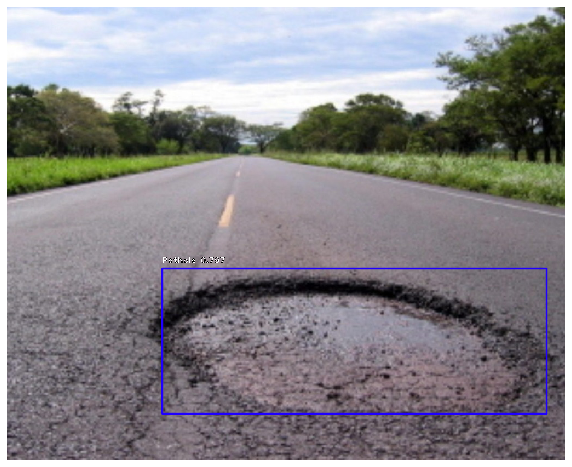

In [ ]:
def img_inference(predicit,draw):
  # image = read_image_bgr(img_infer)
  # image=draw#
  # copy to draw on
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # # preprocess image for network
  # image = preprocess_image(image)#
  # image, scale = resize_image(image)#

  # # process image
  # start = time.time()
  # boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))#
  boxes, scores, labels = predicit.values()
  boxes=np.array([boxes])
  scores=np.array([scores])
  labels=np.array([labels])

  # print(len(scores))
  # print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # print(zip(boxes[0],scores[0],labels[0]))
  # visualize detections
  # for box, score, label in zip(boxes[0], scores[0], labels[0]):

  # print(boxes[0])

  for i in range(len(boxes[0])):
      # scores are sorted so we can break
      box=boxes[0][i]
      score=scores[0][i]
      label=labels[0][i]
      print('Score: '+str(score))
      if score < 0.4:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

  # from datetime import datetime
  # # print(str(datetime.now())+'.png')
  # plt.savefig(str(datetime.now())+'.png')

img_inference(predict_vals,draw)

In [ ]:
requests.get('http://localhost:8401/v1/models/pothole_model')

Score: 0.5235732
Score: 0.5108717
Score: 0.42963082
Score: 0.41950107
Score: 0.35052344


[[371, 363, 724, 485, 0.5235732],
 [412, 311, 619, 376, 0.5108717],
 [0, 150, 117, 201, 0.42963082],
 [393, 298, 685, 396, 0.41950107]]

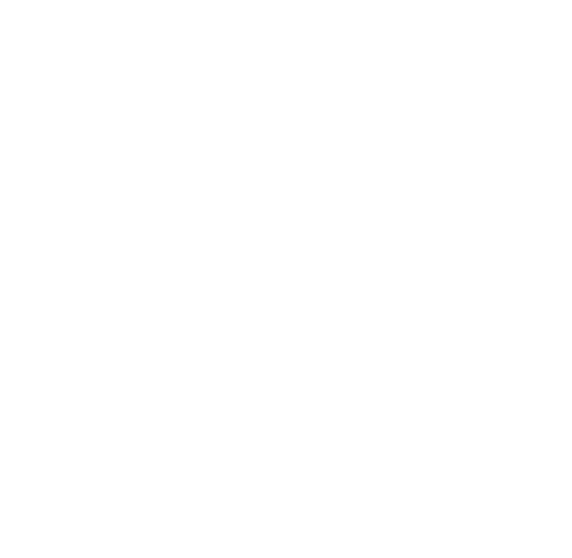

In [ ]:
def img_return(img_path):
  image = read_image_bgr(img_path)
  # image=draw#
  # copy to draw on
  draw=image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # # preprocess image for network
  image = preprocess_image(image)#
  image, scale = resize_image(image)#

  # # process image
  # start = time.time()
  boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))#
  # boxes, scores, labels = predicit.values()
  # boxes=np.array([boxes])
  # scores=np.array([scores])
  # labels=np.array([labels])

  # print(len(scores))
  # print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # print(zip(boxes[0],scores[0],labels[0]))
  # visualize detections
  # for box, score, label in zip(boxes[0], scores[0], labels[0]):

  # print(boxes[0])
  coords = []
  for i in range(len(boxes[0])):
      # scores are sorted so we can break
      box=boxes[0][i]
      score=scores[0][i]
      label=labels[0][i]
      print('Score: '+str(score))
      if score < 0.4:
          break

      color = label_color(label)

      b = box.astype(int)
      b = list(b)
      b.append(score)
      coords.append(b)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  # plt.imshow(draw)
  # plt.show()

  return coords



img_return('data/1.jpg')

# evaluation metrics

In [ ]:
!git clone https://github.com/Isabek/XmlToTxt.git

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 50 (delta 1), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (50/50), done.


In [ ]:
!rm -r eval_pics
!rm -r groundtruths
!rm -r eval_xmls

In [ ]:
x = np.random.randint(1,254,25)

from shutil import copyfile
os.mkdir('eval_xmls')
os.mkdir('eval_pics')

with open('eval_xmls/classes.txt','w') as f:
  f.write('Pothole')
  f.close()

for i in x:
  copyfile('data/'+str(i)+'.xml','eval_xmls/'+str(i)+'.xml')
  copyfile('data/'+str(i)+'.jpg','eval_pics/'+str(i)+'.jpg')

In [ ]:
!pip install -r drive/My\ Drive/Road\ Detection/XmlToTxt/requirements.txt
!mv eval_xmls/classes.txt classes.txt
!python drive/My\ Drive/Road\ Detection/XmlToTxt/xmltotxt.py -xml eval_xmls -out groundtruths

Score: 0.45524555
Score: 0.41649047
Score: 0.39243802
Score: 0.71659243
Score: 0.56796724
Score: 0.5364611
Score: 0.5199217
Score: 0.48098648
Score: 0.4480082
Score: 0.4278093
Score: 0.42770052
Score: 0.41073886
Score: 0.40109354
Score: 0.39625812
Score: 0.9556521
Score: 0.4694756
Score: 0.26357722
Score: 0.82677937
Score: 0.79867065
Score: 0.46917823
Score: 0.40148762
Score: 0.33275557
Score: 0.51488125
Score: 0.39282885
Score: 0.64187837
Score: 0.4955423
Score: 0.45724818
Score: 0.4167591
Score: 0.38842535
Score: 0.4221282
Score: 0.41771737
Score: 0.37578982
Score: 0.4659538
Score: 0.33720165
Score: 0.7974117
Score: 0.2874093
Score: 0.73047656
Score: 0.5036425
Score: 0.48983666
Score: 0.4622099
Score: 0.44828486
Score: 0.44077614
Score: 0.4110796
Score: 0.39627385
Score: 0.775183
Score: 0.47713375
Score: 0.40265164
Score: 0.38484058
Score: 0.4151106
Score: 0.32072562
Score: 0.7973799
Score: 0.36678442
Score: 0.64964294
Score: 0.462768
Score: 0.41531378
Score: 0.39067912
Score: 0.6034

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Score: 0.7641291
Score: 0.624789
Score: 0.57091326
Score: 0.4975504
Score: 0.4937627
Score: 0.4724874
Score: 0.4678517
Score: 0.40376315
Score: 0.3986284
Score: 0.60501397
Score: 0.32146418


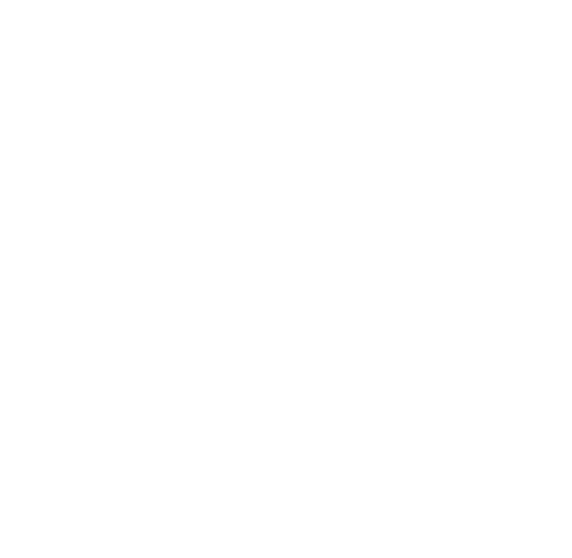

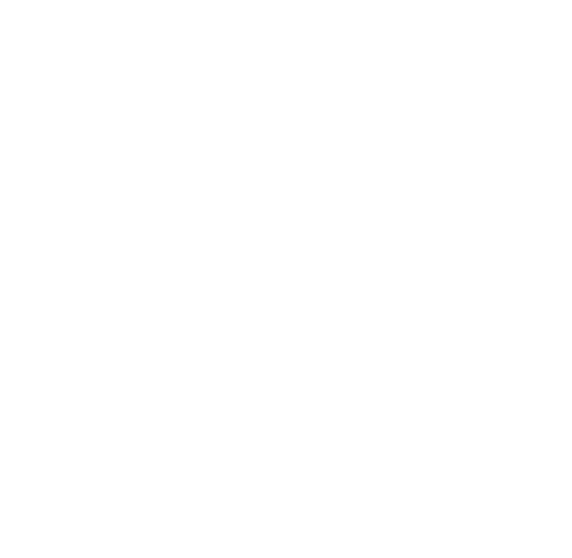

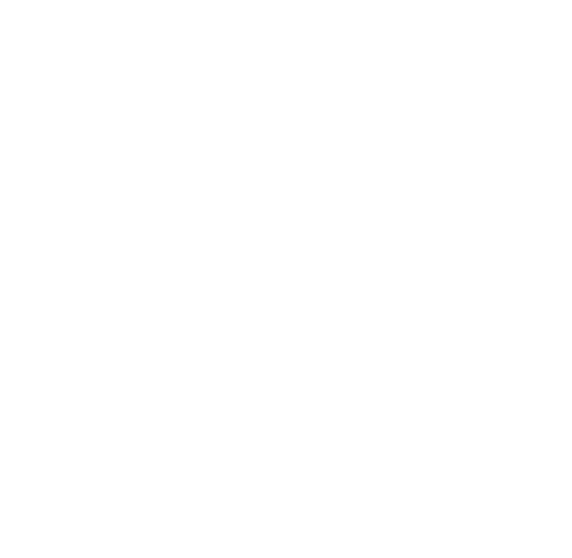

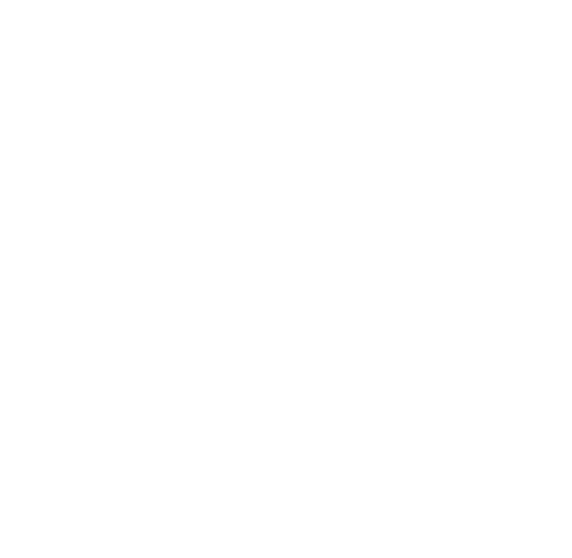

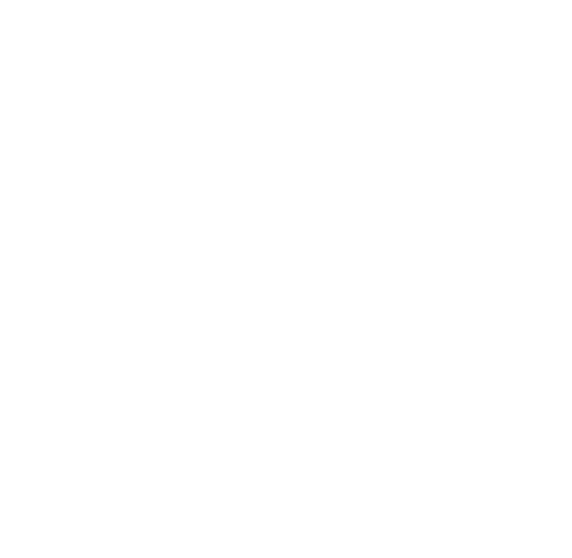

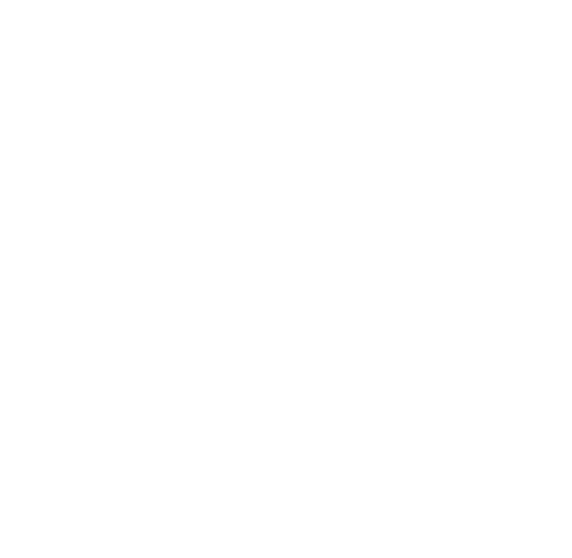

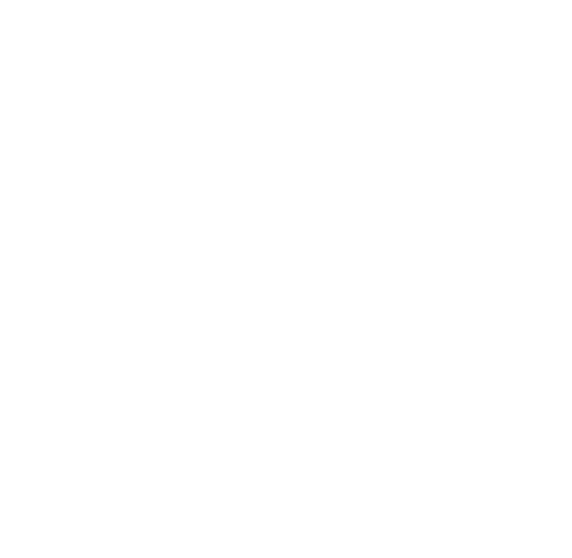

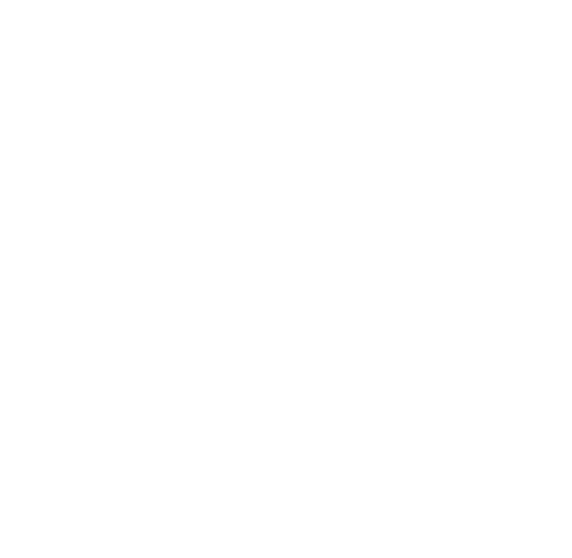

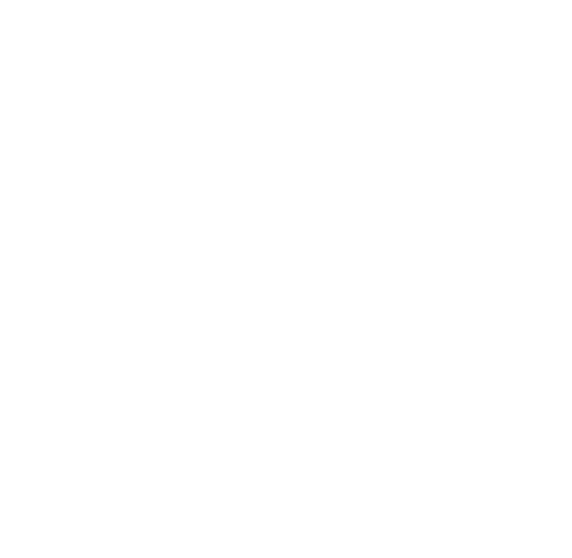

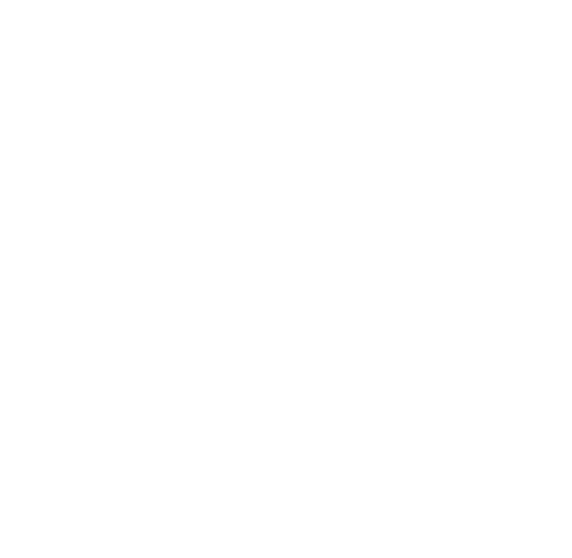

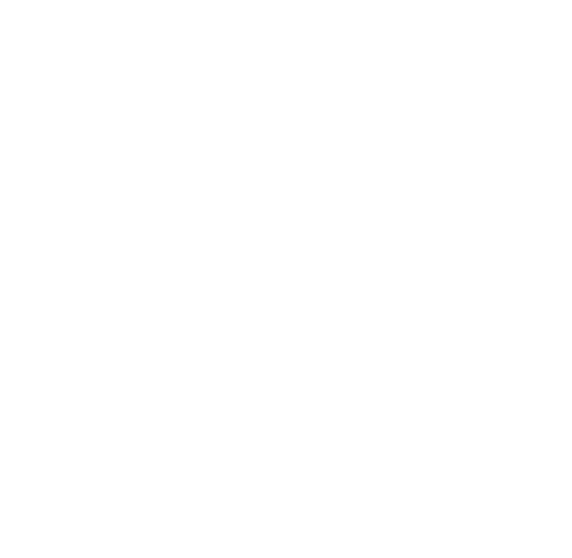

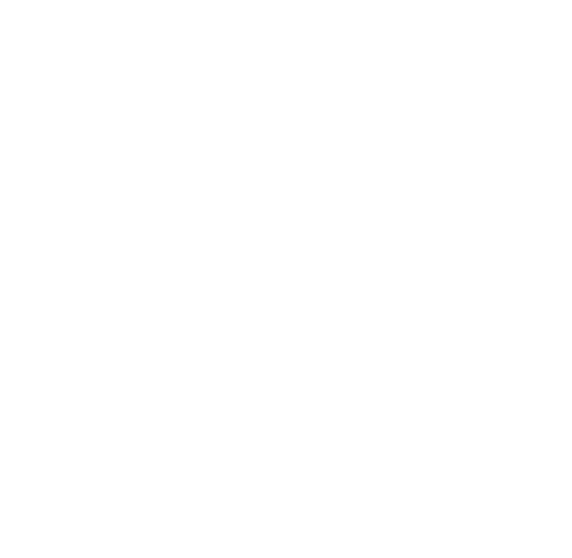

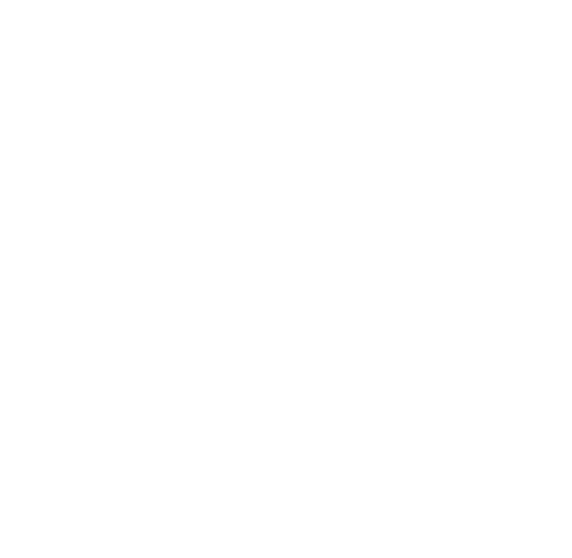

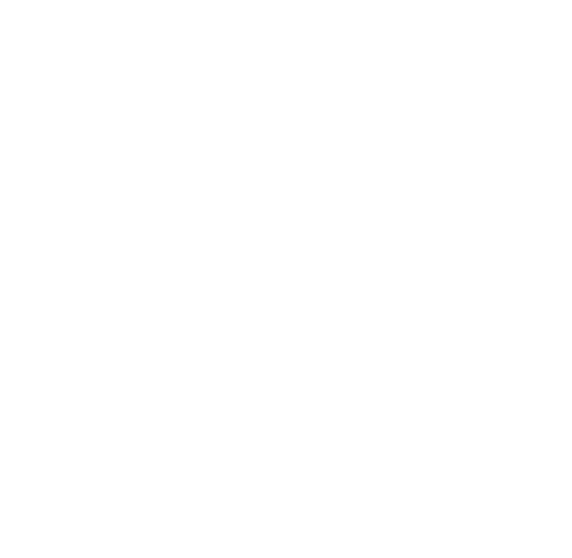

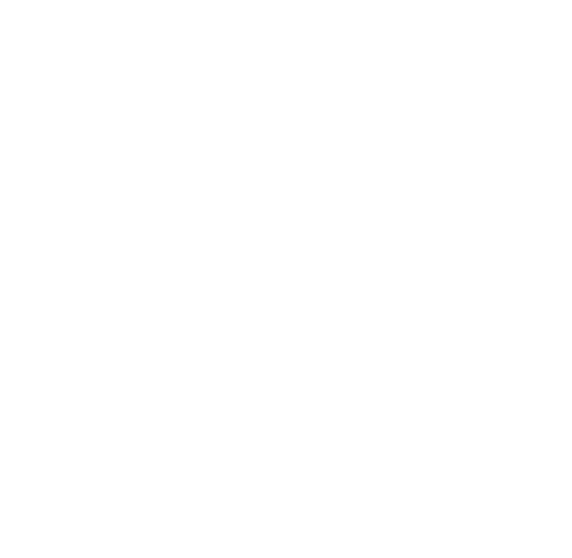

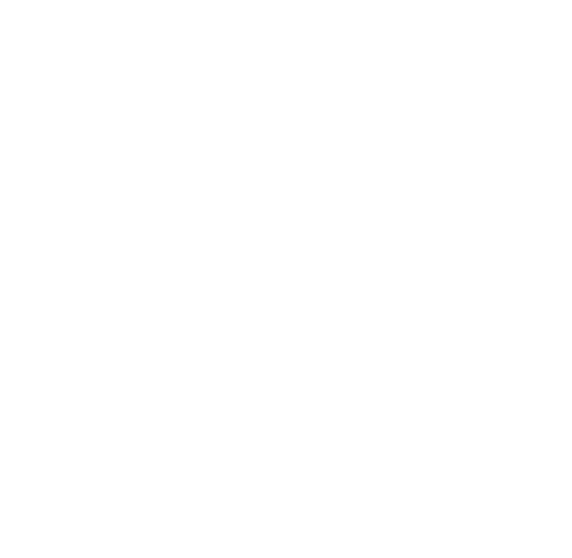

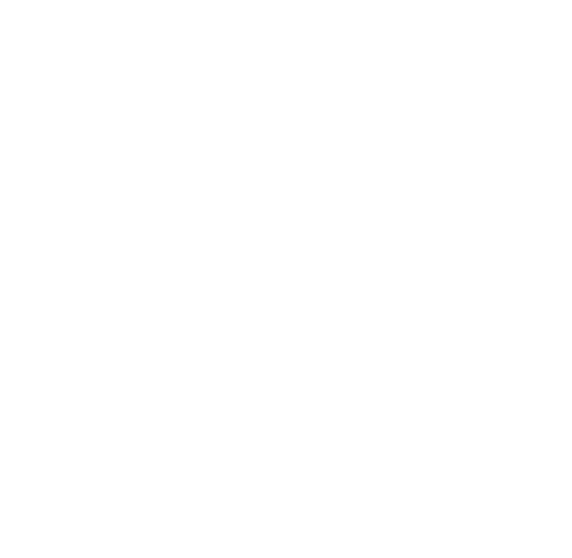

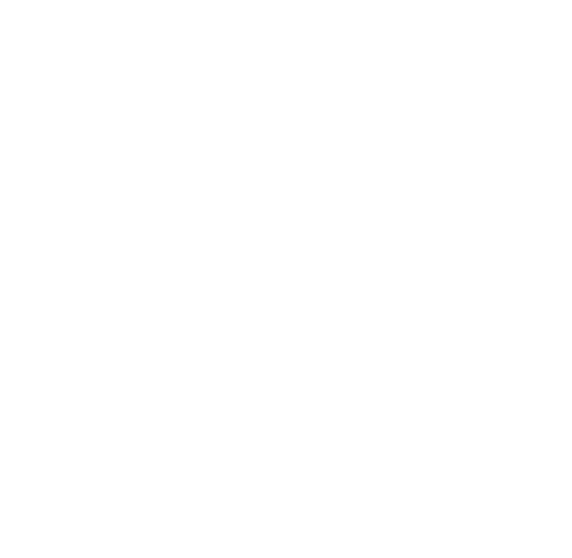

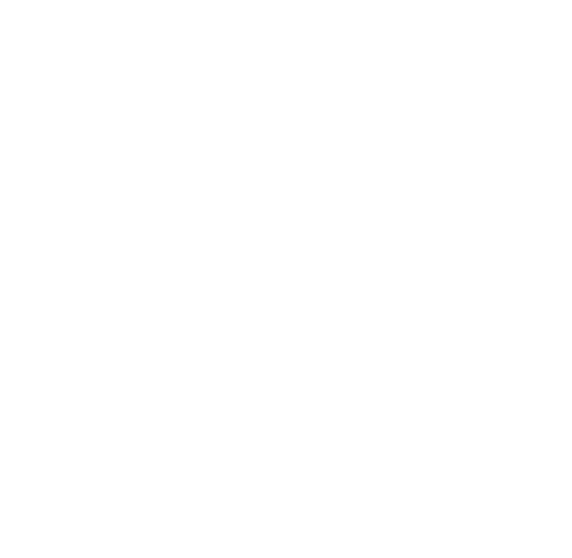

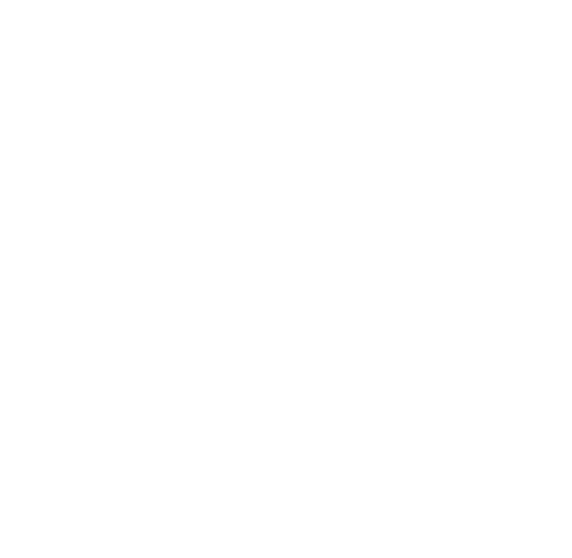

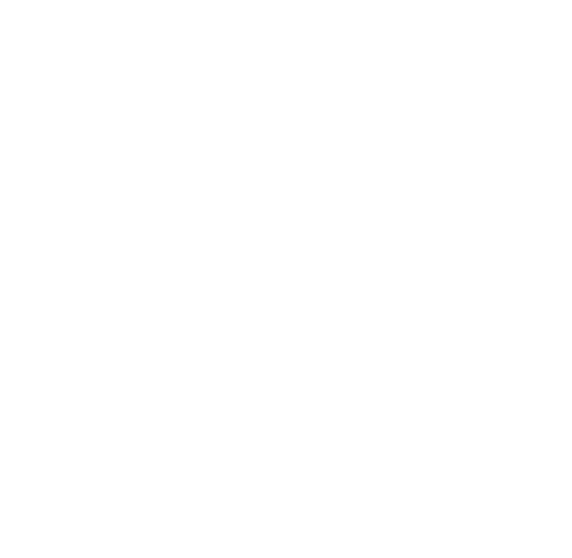

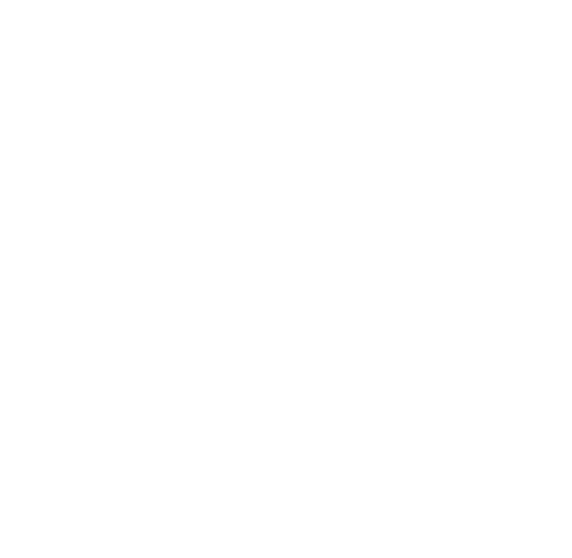

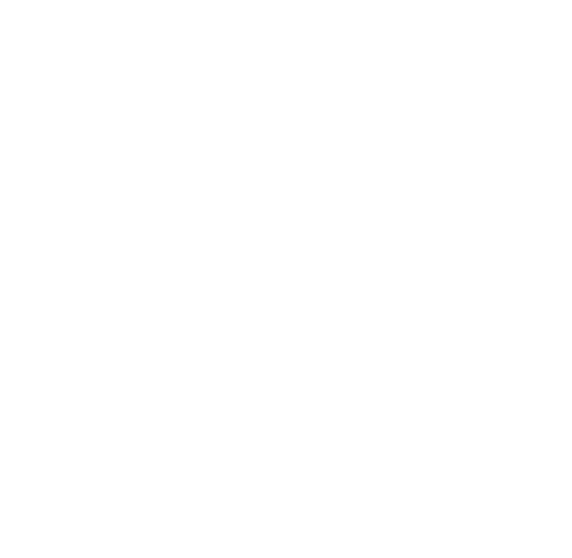

In [ ]:
!rm -r detections
os.mkdir('detections')
for x in os.listdir('eval_pics'):
  li = img_return('eval_pics/'+x)
  f = open('detections/'+x.replace('.jpg','.txt'),'a')
  for i in li:
    st = 'Pothole {} {} {} {} {}'.format(i[0],i[1],i[2],i[3],i[4])
    f.write(st)
    f.write('\n')
  f.close()

In [ ]:
!git clone https://github.com/waterbearbee/Object-Detection-Evaluation-Tool.git

Cloning into 'Object-Detection-Evaluation-Tool'...
remote: Enumerating objects: 1494, done.
remote: Total 1494 (delta 0), reused 0 (delta 0), pack-reused 1494
Receiving objects: 100% (1494/1494), 281.95 KiB | 5.53 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
!python drive/My\ Drive/Road\ Detection/Object-Detection-Evaluation-Tool/test.py -dir /content/detections /content/groundtruths -ratio 0.5 -thre 0.4
# !python drive/My\ Drive/Road\ Detection/Object-Detection-Evaluation-Tool/test.py -h

Your Folder's path: ['/content/detections', '/content/groundtruths']
Overlap Ratio: 0.5
Threshold: 0.4
Num of Categories: 2
Precision: True
Recall: True
FPPIW: True
Calculating......
Num of prediction files:  23
Num of ground truth files:  23
Got prediction file input in TXT type 
Got ground truth file input in TXT type 
class  Pothole  Ap:  0.3190476190476191
class  Pothole precision:  0.5416666666666666
class  Pothole recall:  0.36312849162011174
mAp:  0.3190476190476191
usage: test.py [-h] [-dir DIR [DIR ...]] [-ratio OVERLAPRATIO]
               [-thre THRESHOLD] [-cls CLS] [-prec PRECISION] [-rec RECALL]
               [-FPPIW FPPIW] [-roc ROC] [-pr PR]

Detection Results Test!

optional arguments:
  -h, --help           show this help message and exit
  -dir DIR [DIR ...]   Two folders with detection results and ground truth in
                       each of them， put detection path in front
  -ratio OVERLAPRATIO  Should be in [0, 1], float type, which means the IOU
             

In [ ]:
# !mv Object-Detection-Evaluation-Tool drive/My\ Drive/Road\ Detection/Object-Detection-Evaluation-Tool
# !mv drive/My\ Drive/resnet50_csv_10.h5 drive/My\ Drive/Road\ Detection/resnet50_csv_10.h5
# !mv /content/XmlToTxt drive/My\ Drive/Road\ Detection/XmlToTxt

mv: cannot stat 'drive/My Drive/resnet50_csv_10.h5': No such file or directory
mv: cannot stat '/content/XmlToTxt': No such file or directory
